# Data Analysis based on USDA Dataset
Dataset Source: https://data.world/craigkelly/usda-national-nutrient-db

> Name: Senarath Pathiranalage Nishan Sajeewee Wickramasinghe
>
> ID: Q102091977

## Install required libraries
It is recommended to run this in a seperate python environment with python 3.11

In [1]:
!pip install pandas seaborn matplotlib squarify numpy scikit-learn 

## Import required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## Load the dataset

In [3]:
nutrition_df = pd.read_csv("nutrition dataset.csv")

## Preprocessing

### Handle Null Values

In [4]:
# Check columns with null values
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [5]:
# based on the above results, CommonName, MfgName and ScientificName have null values.
# check null value percentage
def find_null_percentage(null_count: int):
    return ((null_count) / 8618) * 100

common_name_null_count = find_null_percentage(nutrition_df['CommonName'].isnull().sum())
mfg_name_null_count = find_null_percentage(nutrition_df['MfgName'].isnull().sum())
scientific_name_null_count = find_null_percentage(nutrition_df['ScientificName'].isnull().sum())                                       

print(f"Null percentage in column 'CommonName': {common_name_null_count:.2f}%")
print(f"Null percentage in column 'MfgName': {mfg_name_null_count:.2f}%")
print(f"Null percentage in column 'ScientificName': {scientific_name_null_count:.2f}%")

Null percentage in column 'CommonName': 87.67%
Null percentage in column 'MfgName': 81.90%
Null percentage in column 'ScientificName': 91.51%


In [6]:
# Drop columns with null values
nutrition_df.drop(columns=['CommonName', 'MfgName', 'ScientificName'], inplace=True)

### Convert Units

In [7]:
for name, values in nutrition_df.items():
    
    # Convert miligrams to grams
    if name.endswith('mg'):
        name_g = f"{name.split('_')[0]}_g"
        nutrition_df[name_g] = nutrition_df[name] / 1000.0
        nutrition_df.drop(columns=[name], inplace=True)
    
    # Convert micrograms to grams
    elif name.endswith('mcg'):
        name_g = f"{name.split('_')[0]}_g"
        nutrition_df[name_g] = nutrition_df[name] / 1000_000.0
        nutrition_df.drop(columns=[name], inplace=True)
    
    # Drop USRDA values
    if name.endswith('USRDA'):
        nutrition_df.drop(columns=[name], inplace=True)

nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8618 non-null   int64  
 1   FoodGroup     8618 non-null   object 
 2   ShortDescrip  8618 non-null   object 
 3   Descrip       8618 non-null   object 
 4   Energy_kcal   8618 non-null   float64
 5   Protein_g     8618 non-null   float64
 6   Fat_g         8618 non-null   float64
 7   Carb_g        8618 non-null   float64
 8   Sugar_g       8618 non-null   float64
 9   Fiber_g       8618 non-null   float64
 10  VitA_g        8618 non-null   float64
 11  VitB6_g       8618 non-null   float64
 12  VitB12_g      8618 non-null   float64
 13  VitC_g        8618 non-null   float64
 14  VitE_g        8618 non-null   float64
 15  Folate_g      8618 non-null   float64
 16  Niacin_g      8618 non-null   float64
 17  Riboflavin_g  8618 non-null   float64
 18  Thiamin_g     8618 non-null 

## Save Preprocessed Dataset

In [31]:
nutrition_df.to_csv('preprocessed_nutrition_dataset.csv')

# Feature Selection

## Tree Based Feature Importance

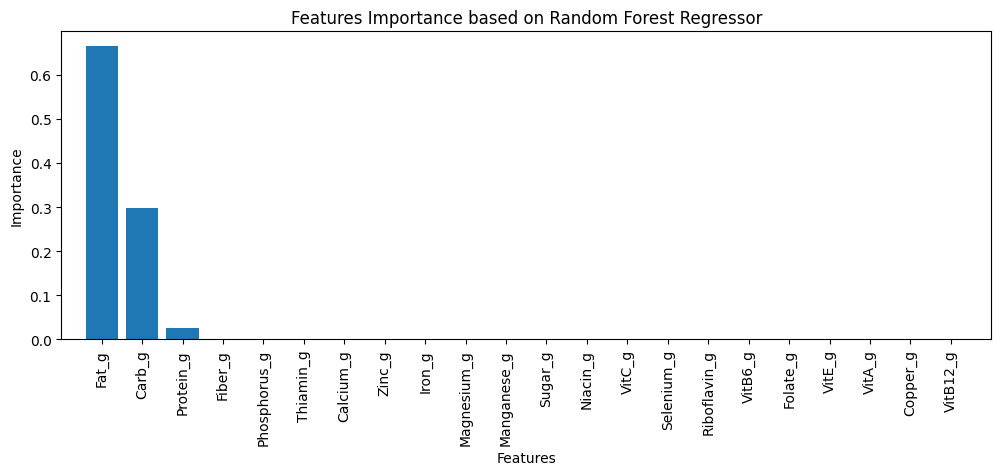

In [8]:
# Load the dataset
X = nutrition_df[['Fat_g', 'Carb_g', 'Protein_g',
       'Sugar_g', 'Fiber_g', 'VitA_g', 'VitB6_g', 'VitB12_g', 'VitC_g',
       'VitE_g', 'Folate_g', 'Niacin_g', 'Riboflavin_g', 'Thiamin_g',
       'Calcium_g', 'Copper_g', 'Iron_g', 'Magnesium_g', 'Manganese_g',
       'Phosphorus_g', 'Selenium_g', 'Zinc_g']]
y = nutrition_df['Energy_kcal']

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 4))
plt.title("Features Importance based on Random Forest Regressor")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

## Correlation Based Feature Importance

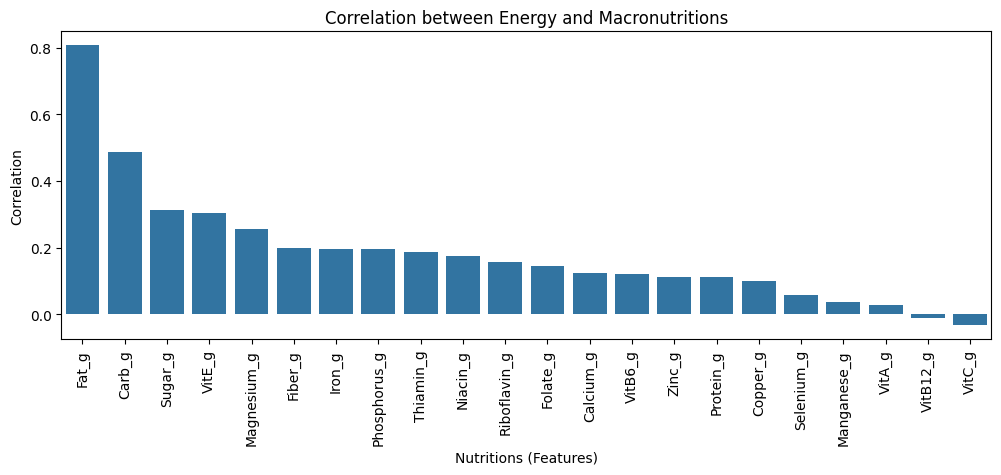

In [9]:
selected_df = nutrition_df[['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_g', 'VitB6_g', 'VitB12_g', 'VitC_g',
       'VitE_g', 'Folate_g', 'Niacin_g', 'Riboflavin_g', 'Thiamin_g',
       'Calcium_g', 'Copper_g', 'Iron_g', 'Magnesium_g', 'Manganese_g',
       'Phosphorus_g', 'Selenium_g', 'Zinc_g']]

energy_correlated_df = selected_df.corr(numeric_only=True)[["Energy_kcal"]].sort_values(by='Energy_kcal', ascending=False)[1:]
energy_correlated_df["Nutritions"] = energy_correlated_df.index
energy_correlated_df.reset_index(inplace=True, drop=True)

# Plot correlation
plt.figure(figsize=(12, 4))
plt.title("Correlation between Energy and Macronutritions")
sns.barplot(energy_correlated_df, x="Nutritions", y="Energy_kcal")
plt.xticks(rotation=90)
plt.xlabel("Nutritions (Features)")
plt.ylabel("Correlation")
plt.show()

# Explanatory Data Analysis

## Descriptive Analysis
This will perform descriptive analysis.

In [10]:
nutrition_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8618.0,1.546776e+04,9.221429e+03,1001.0,8.695250e+03,1.427300e+04,2.005075e+04,93600.000000
Energy_kcal,8618.0,2.264386e+02,1.693889e+02,0.0,9.300000e+01,1.910000e+02,3.360000e+02,902.000000
Protein_g,8618.0,1.152391e+01,1.055059e+01,0.0,2.470000e+00,8.285000e+00,1.997750e+01,88.320000
Fat_g,8618.0,1.064702e+01,1.586635e+01,0.0,9.925000e-01,5.235000e+00,1.390000e+01,100.000000
Carb_g,8618.0,2.181906e+01,2.723900e+01,0.0,4.000000e-02,8.945000e+00,3.290000e+01,100.000000
Sugar_g,8618.0,6.560253e+00,1.360210e+01,0.0,0.000000e+00,3.700000e-01,5.300000e+00,99.800000
Fiber_g,8618.0,2.023242e+00,4.313670e+00,0.0,0.000000e+00,3.000000e-01,2.400000e+00,79.000000
VitA_g,8618.0,9.396879e-05,7.793622e-04,0.0,0.000000e+00,1.500000e-06,2.100000e-05,0.030000
VitB6_g,8618.0,2.643692e-04,4.786141e-04,0.0,3.425000e-05,1.200000e-04,3.550000e-04,0.012000
VitB12_g,8618.0,1.225260e-06,4.319183e-06,0.0,0.000000e+00,8.000000e-08,1.297500e-06,0.000099


## Univariate Analysis

### Violin Plots

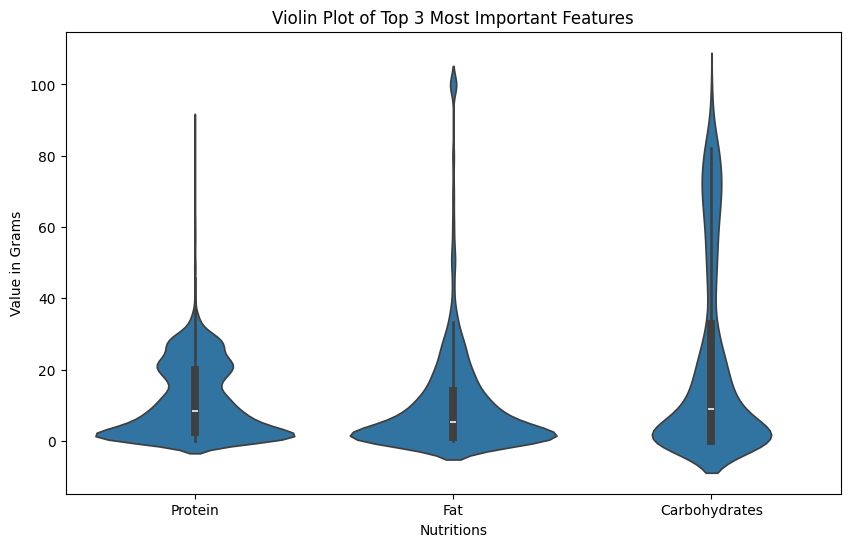

In [11]:
# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Combine all four features into a single DataFrame
combined_data = pd.melt(nutrition_df, value_vars=['Protein_g', 'Fat_g', 'Carb_g'])

# Plot the violin plot
sns.violinplot(x='variable', y='value', data=combined_data, ax=ax, )

# Customize the plot (add labels, title, etc.)
plt.xlabel('Nutritions')
plt.ylabel('Value in Grams')
plt.title('Violin Plot of Top 3 Most Important Features')

custom_labels = ['Protein', 'Fat', 'Carbohydrates']
plt.xticks(range(len(custom_labels)), labels=custom_labels)

# Show the plot
plt.show()

### Histograms

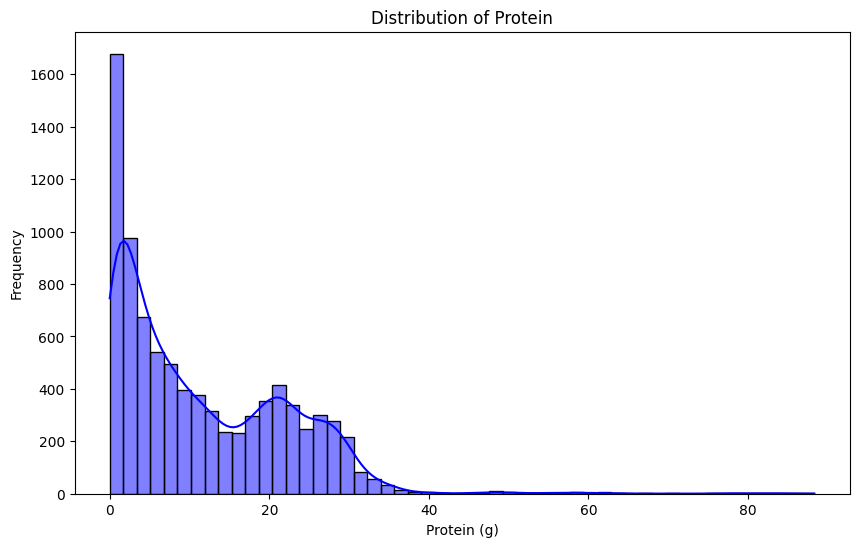

In [12]:
# Destribution of Proteins
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_df['Protein_g'], kde=True, color='blue')
plt.title('Distribution of Protein')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')
plt.show()

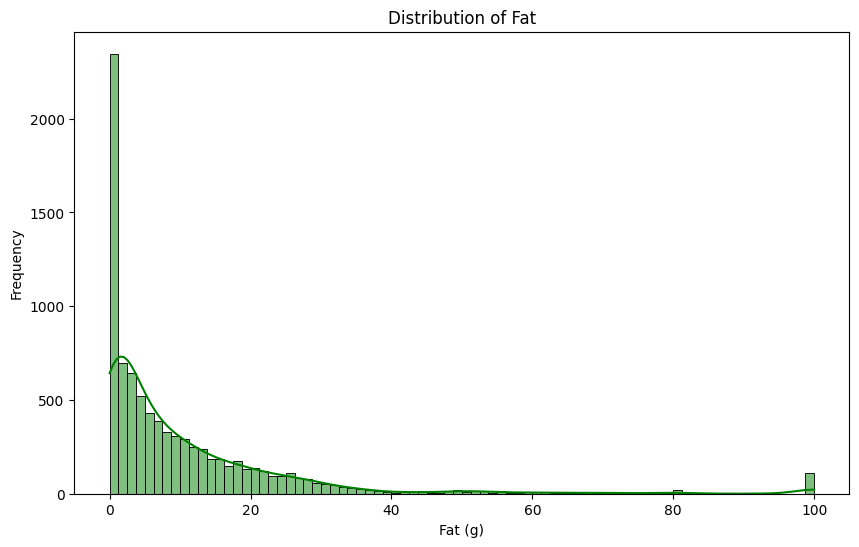

In [13]:
# Distribution of Fat
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_df['Fat_g'], kde=True, color='green')
plt.title('Distribution of Fat')
plt.xlabel('Fat (g)')
plt.ylabel('Frequency')
plt.show()

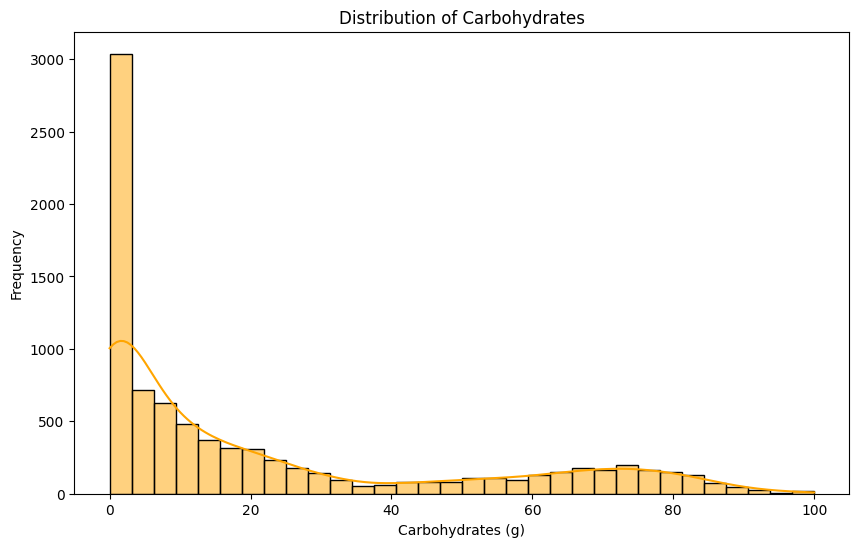

In [14]:
# Distribution of Carbohydrates
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_df['Carb_g'], kde=True, color='orange')
plt.title('Distribution of Carbohydrates')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Frequency')
plt.show()

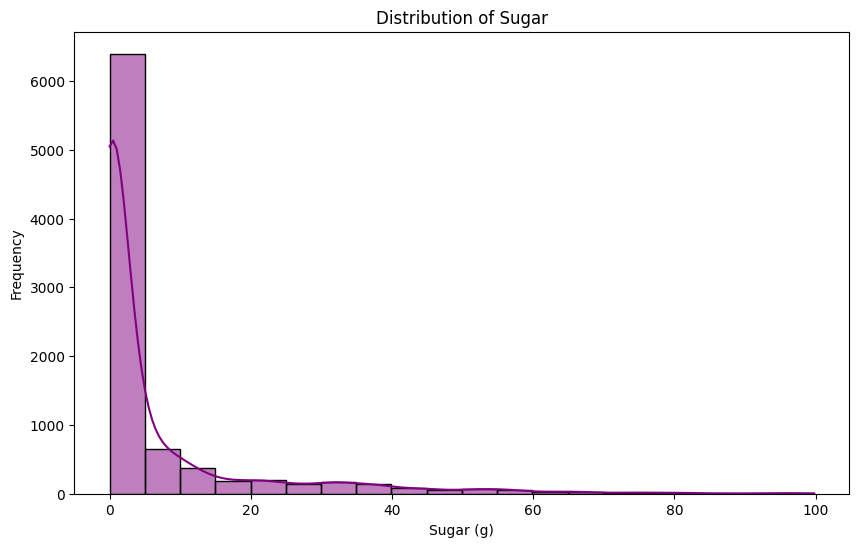

In [15]:
# Distribution of Sugar
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_df['Sugar_g'], kde=True, color='purple', binwidth=5)
plt.title('Distribution of Sugar')
plt.xlabel('Sugar (g)')
plt.ylabel('Frequency')
plt.show()

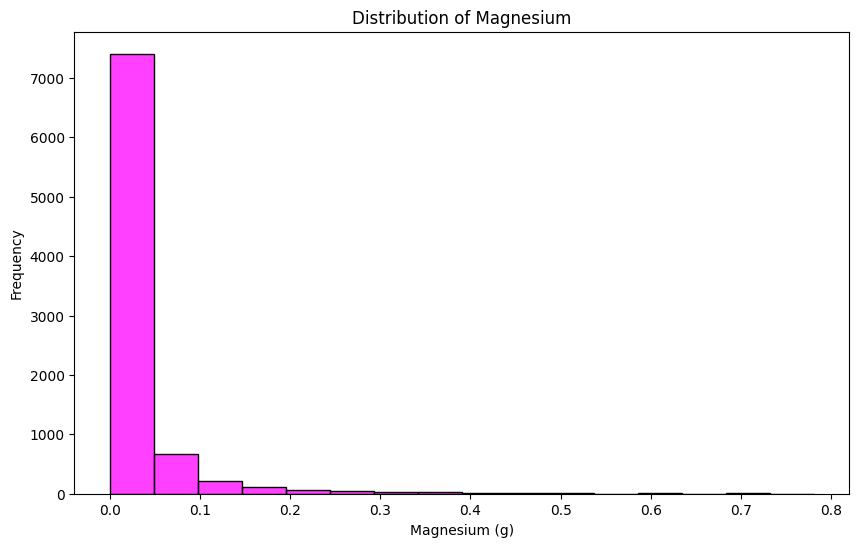

In [16]:
# Distribution of Magnesium
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_df['Magnesium_g'], kde=False, color='magenta', binwidth=0.05)
plt.title('Distribution of Magnesium')
plt.xlabel('Magnesium (g)')
plt.ylabel('Frequency')
plt.show()

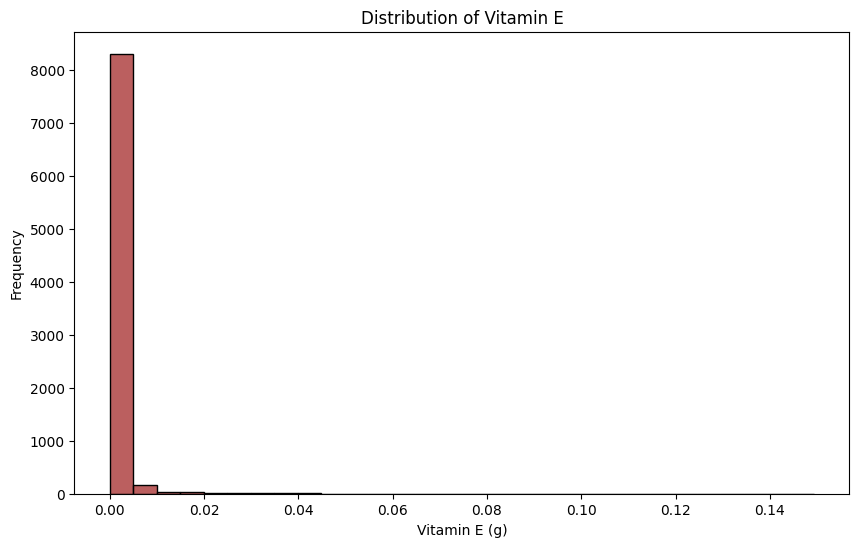

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(nutrition_df['VitE_g'], kde=False, color='brown', binwidth=0.005)
plt.title('Distribution of Vitamin E')
plt.xlabel('Vitamin E (g)')
plt.ylabel('Frequency')
plt.show()

### Tree Map

C:\Users\nisha\AppData\Local\Temp\ipykernel_31636\3831556476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruits_df['Fruit_Name'] = fruits_df['Descrip'].apply(lambda x: x.split(',')[0])


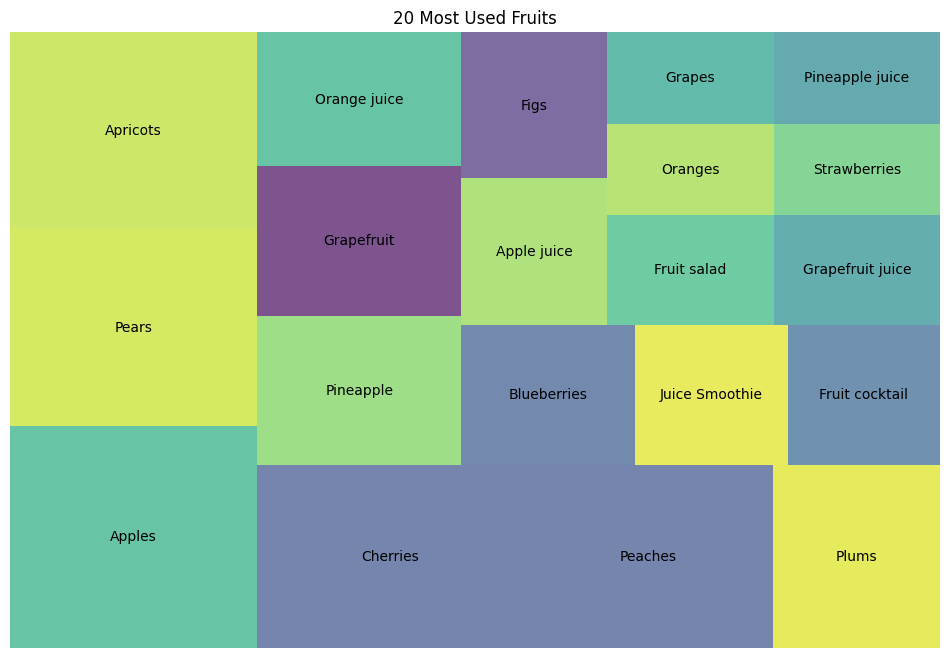

In [18]:
# Filter the dataset for "Fruits and Fruit Juices"
fruits_df = nutrition_df[nutrition_df['FoodGroup'] == 'Fruits and Fruit Juices']

# Extract the name of the fruit or juice from the "Descrip" column
fruits_df['Fruit_Name'] = fruits_df['Descrip'].apply(lambda x: x.split(',')[0])

fruit_counts = fruits_df['Fruit_Name'].value_counts()
fruit_counts = fruit_counts.head(20)

# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=fruit_counts.values, label=fruit_counts.index, alpha=0.7)
plt.axis('off')
plt.title('20 Most Used Fruits')
plt.show()

### Bar Chart

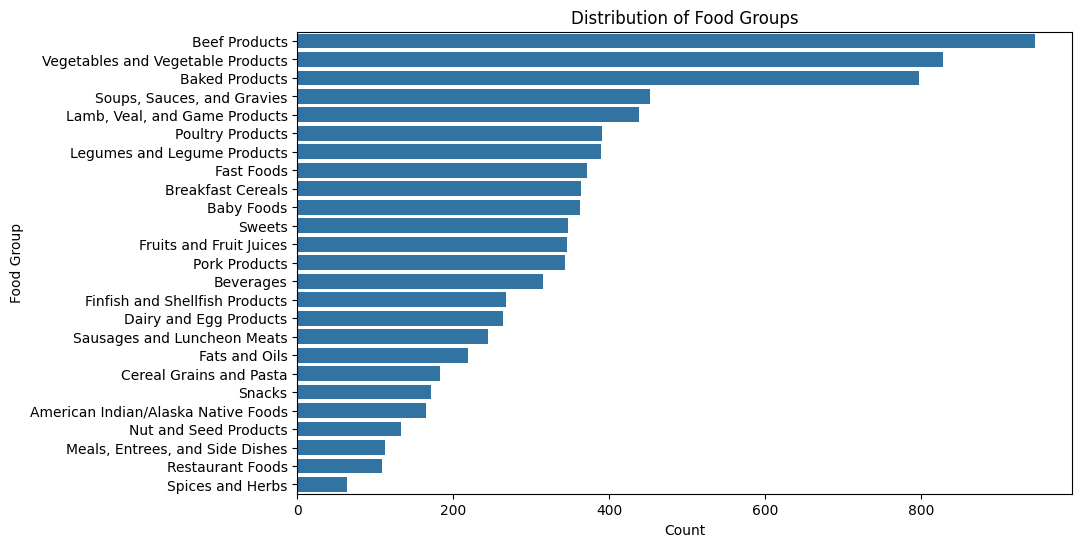

In [19]:
# Distribution of count of each food group
plt.figure(figsize=(10, 6))
sns.countplot(y='FoodGroup', data=nutrition_df, order=nutrition_df['FoodGroup'].value_counts().index)
plt.title('Distribution of Food Groups')
plt.xlabel('Count')
plt.ylabel('Food Group')
plt.show()

## Bivariate Analysis

Text(0.5, 0.98, 'Relationship Between Energy and Three Most Important Features')

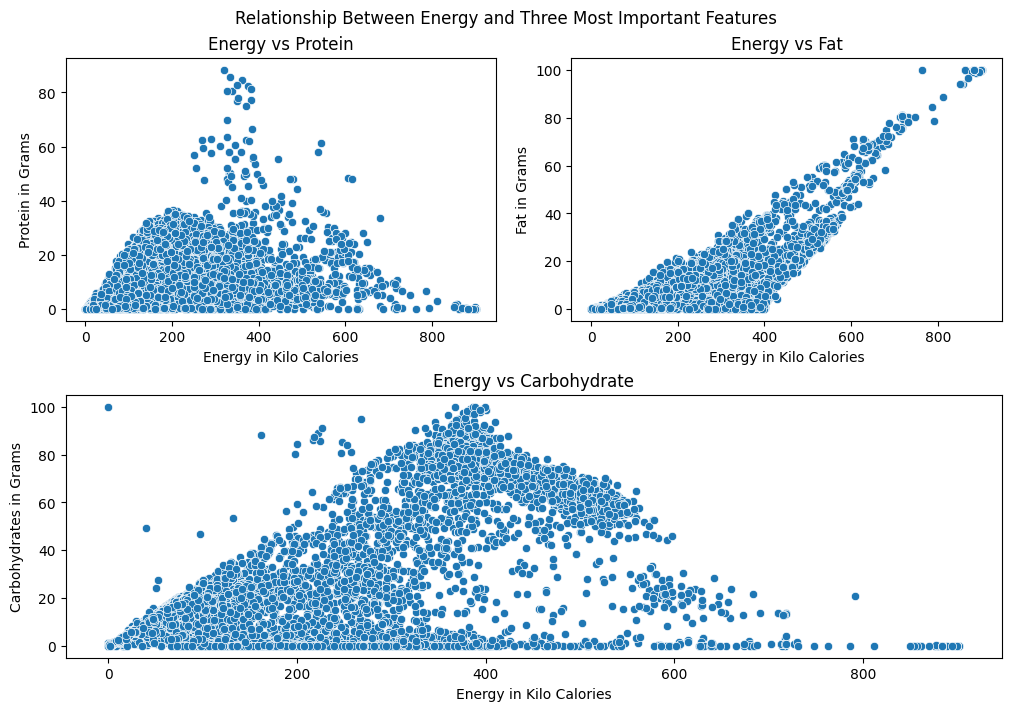

In [20]:
fig, axes = plt.subplot_mosaic([['left', 'right'],['bottom', 'bottom']],
                              constrained_layout=True, figsize=(10, 7))

# Scatterplot 1 (top-left)
sns.scatterplot(x='Energy_kcal', y='Protein_g', data=nutrition_df, ax=axes['left'])
axes['left'].set_title('Energy vs Protein')
axes['left'].set_ylabel('Protein in Grams')
axes['left'].set_xlabel('Energy in Kilo Calories')

# Scatterplot 2 (top-right)
sns.scatterplot(x='Energy_kcal', y='Fat_g', data=nutrition_df, ax=axes['right'])
axes['right'].set_title('Energy vs Fat')
axes['right'].set_ylabel('Fat in Grams')
axes['right'].set_xlabel('Energy in Kilo Calories')

# Scatterplot 3 (bottom)
sns.scatterplot(x='Energy_kcal', y='Carb_g', data=nutrition_df, ax=axes['bottom'])
axes['bottom'].set_title('Energy vs Carbohydrate')
axes['bottom'].set_ylabel('Carbohydrates in Grams')
axes['bottom'].set_xlabel('Energy in Kilo Calories')

fig.suptitle('Relationship Between Energy and Three Most Important Features')

C:\Users\nisha\AppData\Local\Temp\ipykernel_31636\505811869.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Energy_kcal', y='FoodGroup', data=average_energy, palette='viridis')


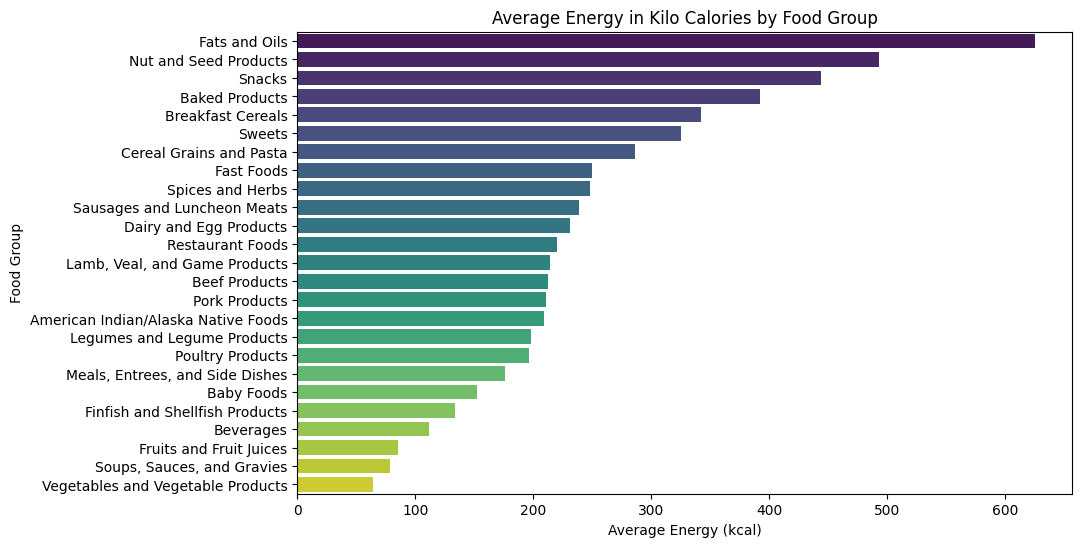

In [21]:
# Calculate the average energy for each food group
average_energy = nutrition_df.groupby('FoodGroup')['Energy_kcal'].mean().reset_index()
average_energy.sort_values(by=["Energy_kcal"], ascending=False, inplace=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Energy_kcal', y='FoodGroup', data=average_energy, palette='viridis')
plt.title('Average Energy in Kilo Calories by Food Group')
plt.xlabel('Average Energy (kcal)')
plt.ylabel('Food Group')
plt.show()

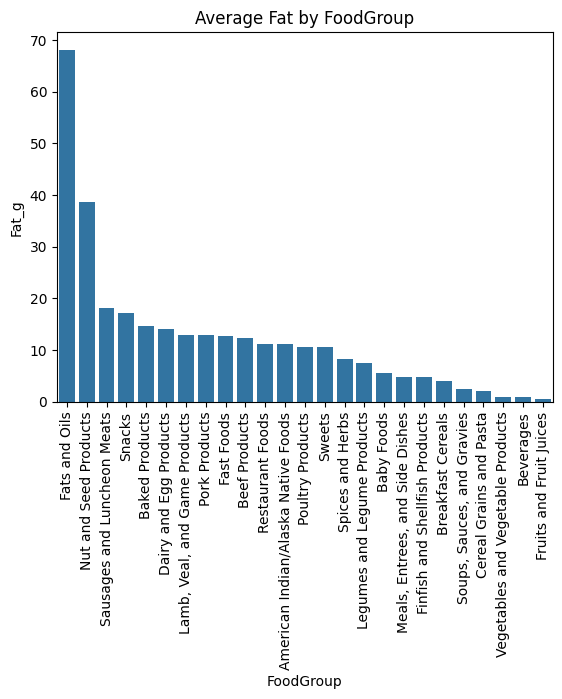

In [22]:
mean_fat = nutrition_df.groupby('FoodGroup')['Fat_g'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='FoodGroup', y='Fat_g', data=mean_fat)
plt.xticks(rotation=90)
plt.title('Average Fat by FoodGroup')
plt.show()

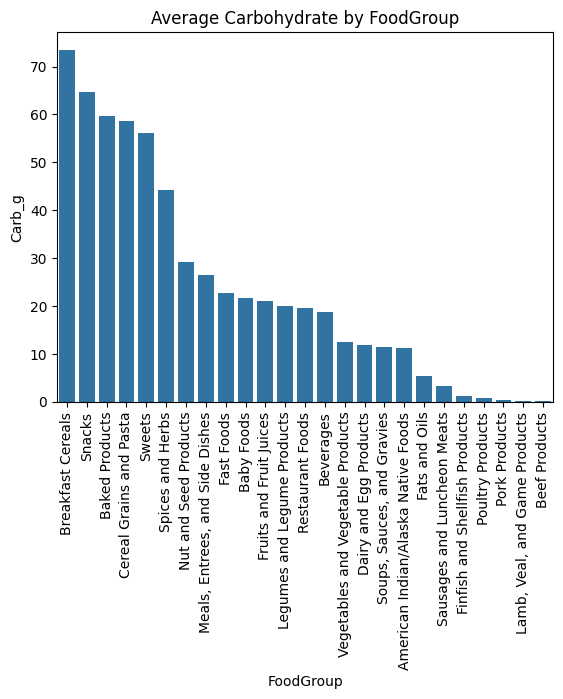

In [23]:
mean_carb = nutrition_df.groupby('FoodGroup')['Carb_g'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='FoodGroup', y='Carb_g', data=mean_carb)
plt.xticks(rotation=90)
plt.title('Average Carbohydrate by FoodGroup')
plt.show()

## Multivariate Analysis

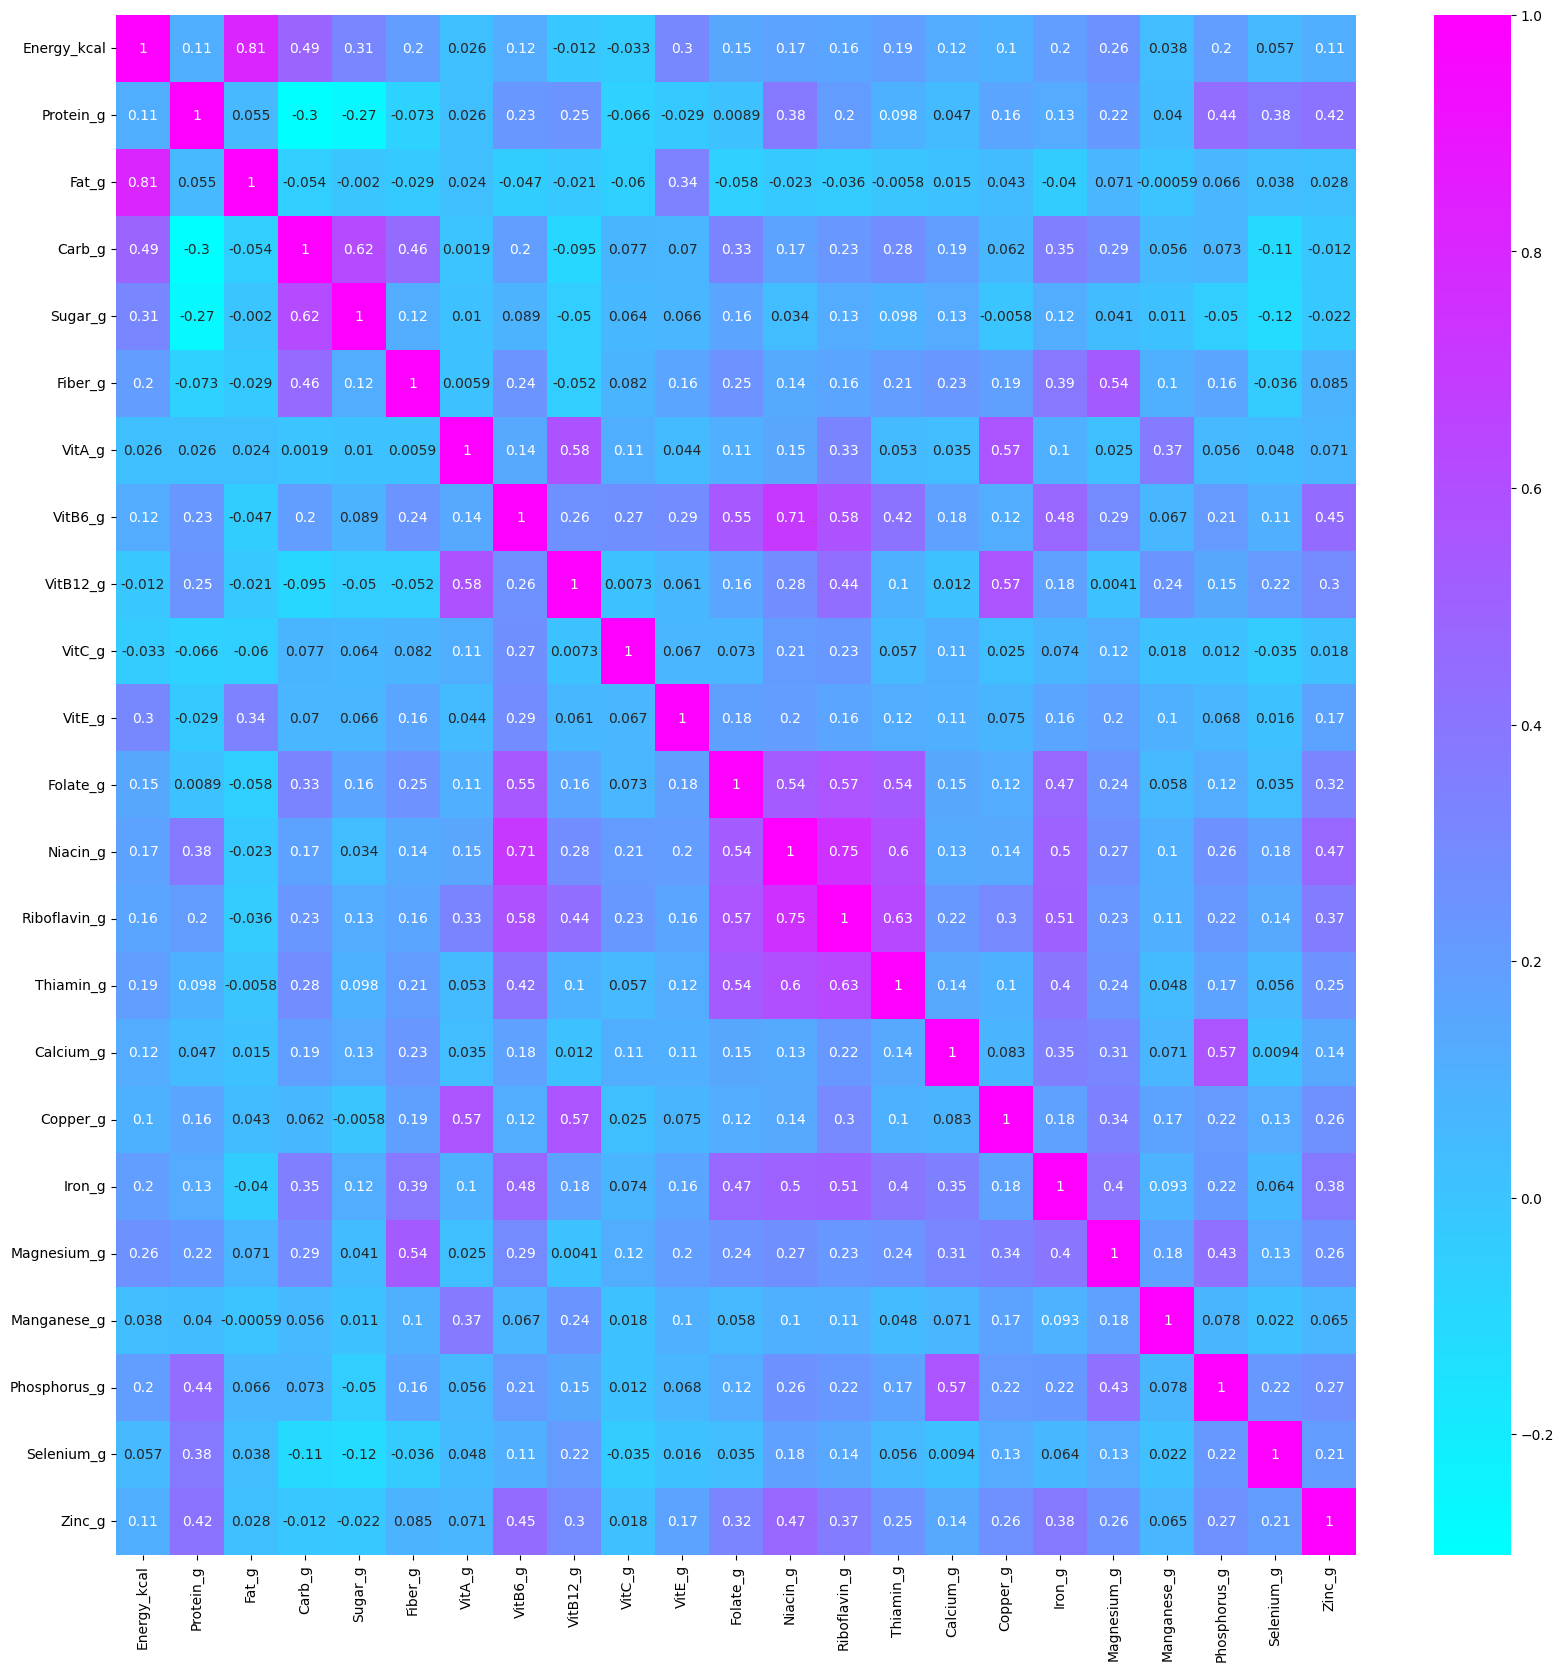

In [24]:
# Find the correlation
correlation = nutrition_df[['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_g', 'VitB6_g', 'VitB12_g', 'VitC_g',
       'VitE_g', 'Folate_g', 'Niacin_g', 'Riboflavin_g', 'Thiamin_g',
       'Calcium_g', 'Copper_g', 'Iron_g', 'Magnesium_g', 'Manganese_g',
       'Phosphorus_g', 'Selenium_g', 'Zinc_g']].corr()

# Draw the heatmap
plot = sns.heatmap(correlation, annot=True, cmap="cool")
plot.figure.set_figwidth(20)
plot.figure.set_figheight(20)

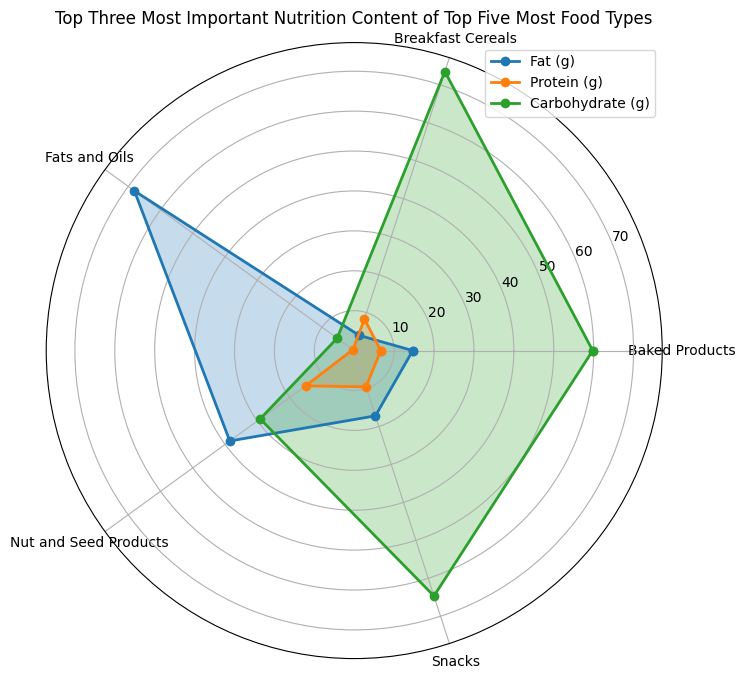

In [25]:
five_most_energitic_food_groups = nutrition_df.groupby("FoodGroup").mean('Energy_kcal')['Energy_kcal'].sort_values(ascending=False)[:5].index.tolist()

grouped_df = nutrition_df.loc[nutrition_df['FoodGroup'].isin(five_most_energitic_food_groups)]
grouped_df = grouped_df.groupby(by='FoodGroup').mean(numeric_only=True)[['Fat_g', 'Protein_g', 'Carb_g']]

food_groups = grouped_df.index.tolist()
fat_values = grouped_df['Fat_g'].values.tolist()
protein_values = grouped_df['Protein_g'].values.tolist()
carb_values = grouped_df['Carb_g'].values.tolist()


# Create a radar chart
angles = np.linspace(0, 2 * np.pi, len(food_groups), endpoint=False).tolist()
fat_values += fat_values[:1]
protein_values += protein_values[:1]
carb_values += carb_values[:1]
angles += angles[:1]

plt.figure(figsize=(8, 8))

# Plot fat content
plt.polar(angles, fat_values, marker='o', linestyle='-', linewidth=2, label='Fat (g)')
plt.fill(angles, fat_values, alpha=0.25)

# Plot protein content
plt.polar(angles, protein_values, marker='o', linestyle='-', linewidth=2, label='Protein (g)')
plt.fill(angles, protein_values, alpha=0.25)

# Plot carb content
plt.polar(angles, carb_values, marker='o', linestyle='-', linewidth=2, label='Carbohydrate (g)')
plt.fill(angles, carb_values, alpha=0.25)

plt.xticks(angles[:-1], food_groups)
plt.title('Top Three Most Important Nutrition Content of Top Five Most Food Types')
plt.legend(loc='upper right')

plt.show()

# Predictive Analysis
Predictive analysis is carried out in this section based on the selected feature and target variables.

In [26]:
# Initialize a dataframe to store the evaluation metrics
EVALUATION_RESULTS = pd.DataFrame(index=['mae', 'mse', 'rmse', 'r2'])

In [27]:
# Prepare X (independent) variables and y (dependent) variable.
X = nutrition_df[['Fat_g', 'Carb_g', 'Protein_g', 'Sugar_g', 'VitE_g', 'Magnesium_g']]
y = nutrition_df[['Energy_kcal']]

In [28]:
# Split the dataset into two (train and test) parts.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [29]:
# Define the functions that are required for prediction and evaluation purposes.
def evaluate(y_pred, y_test, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    EVALUATION_RESULTS[model_name] = [mae, mse, rmse, r2]

def fit_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate(y_pred, y_test, model_name)

In [30]:
# Initialize the set of models within a dictionary that can be used to predict.
# So the dataset can be predicted and evaluated with all models iteratively.
models = {
    'linear_regression': LinearRegression(),
    'svr_linear': SVR(kernel='linear'),
    'svr_rbf': SVR(kernel='rbf'),
    'knn': KNeighborsRegressor(n_neighbors=5),
    'dnn': MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
}
# Similary, create a set of scalers within a dictionary.
scalers = {
    'min_max_scaler': (MinMaxScaler(), MinMaxScaler()),
    'standard_scaler': (StandardScaler(), StandardScaler()),
    'normalize': (Normalizer(), Normalizer()),
}

# Iterate through each model and scalers to predict and evaluate.
for model_data in models.items():
    model_name = model_data[0]
    model = model_data[1]

    # Evaluate the model without any scaler.
    fit_and_evaluate(model, model_name, X_train, y_train, X_test, y_test)

    # Perform model prediction and evaluation with all defined scalers.
    for scaler_details in scalers.items():
        scaler_name = scaler_details[0]
        x_scaler = scaler_details[1][0]
        y_scaler = scaler_details[1][1]

        x_scaler.fit(X_train)
        y_scaler.fit(y_train)

        X_train_scaled = x_scaler.transform(X_train)
        y_train_scaled = y_scaler.transform(y_train)
        X_test_scaled = x_scaler.transform(X_test)
        y_test_scaled = y_scaler.transform(y_test)

        fit_and_evaluate(model, f'{model_name}_{scaler_name}', X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

# Display the final evaluation results
EVALUATION_RESULTS.T

c:\Users\nisha\anaconda3\envs\com725\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nisha\anaconda3\envs\com725\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nisha\anaconda3\envs\com725\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nisha\anaconda3\envs\com725\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expec

,mae,mse,rmse,r2
linear_regression,7.537450,485.230260,22.027943,0.982263
linear_regression_min_max_scaler,0.008356,0.000596,0.024421,0.982263
linear_regression_standard_scaler,0.044245,0.016719,0.129304,0.982263
linear_regression_normalize,0.008296,0.001645,0.040558,0.525697
svr_linear,7.583153,531.927412,23.063552,0.980556
svr_linear_min_max_scaler,0.050180,0.003345,0.057837,0.900514
svr_linear_standard_scaler,0.054421,0.016799,0.129611,0.982178
svr_linear_normalize,0.042445,0.003754,0.061268,-0.082359
svr_rbf,18.667918,2496.350358,49.963490,0.908748
svr_rbf_min_max_scaler,0.043433,0.002816,0.053061,0.916265
